MEDICAL INSURANCE COST PROJECT.

• Summary of the study and data, as well as any relevant substantive context, background, or
framing issues.
• The “big questions” answered by your data analyses, and summaries of your conclusions about
these questions.
• Brief outline of remainder of paper.

EXPLORATORY DATA ANALISIS

In [119]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
df = pd.read_csv('insurance.csv')
df.index.name = 'id'
df = df.reset_index()
pread = df.head()
print(pread)
lenread = len(df)
print(lenread)



   id  age     sex     bmi  children smoker     region      charges
0   0   19  female  27.900         0    yes  southwest  16884.92400
1   1   18    male  33.770         1     no  southeast   1725.55230
2   2   28    male  33.000         3     no  southeast   4449.46200
3   3   33    male  22.705         0     no  northwest  21984.47061
4   4   32    male  28.880         0     no  northwest   3866.85520
1338


In [99]:
columns = df.columns
print(columns)
data_types = df.dtypes
print(data_types)
Region = df.region.unique()
print(Region)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
['southwest' 'southeast' 'northwest' 'northeast']


In [100]:
#Calculate the mean of the numerical variables
bmi_mean = df.bmi.mean()
charges_mean = df.charges.mean()
print(bmi_mean, charges_mean)
#Calculate the trimmed mean of the variables
bmi_trimmed_mean = st.trim_mean(df.bmi, 0.1)
charges_trimmed_mean = st.trim_mean(df.charges, 0.1)
print(bmi_trimmed_mean, charges_trimmed_mean)
# The charges vary with 10% of the max and min values, so the outliers have to be important

#Calculate the median of the numerical variables
bmi_median = df.bmi.median()
charges_median = df.charges.median()
print(bmi_median, charges_median)

#Calculate all the info

bmi_info = df.bmi.describe()
charges_info = df.charges.describe()
print(bmi_info, charges_info)

30.663396860986538 13270.422265141257
30.50021455223881 11076.019520008396
30.4 9382.033
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64 count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


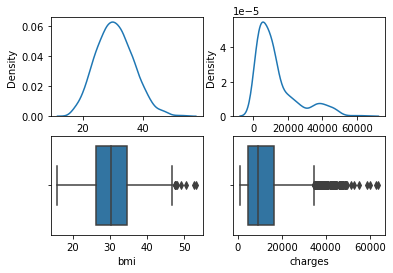

In [101]:
#We are going to see all the data before in a diagram
plt.subplot(2,2,1)
bmi_kdeplot = sns.kdeplot(df.bmi)
plt.subplot(2,2,2)
charges_kdeplot = sns.kdeplot(df.charges)
plt.subplot(2,2,3)
bmi_boxplot = sns.boxplot(data=df, x='bmi')
plt.subplot(2,2,4)
charges_boxplot = sns.boxplot(data=df, x='charges')

0    male
dtype: object 0    no
dtype: object 0    southeast
dtype: object


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


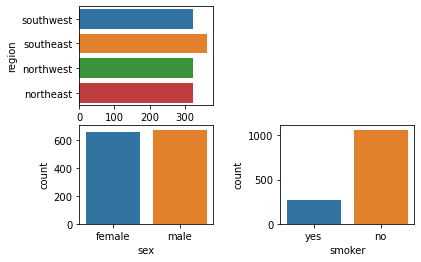

In [102]:
sex_mode = df.sex.mode()
smoker_mode = df.smoker.mode()
region_mode = df.region.mode()
print(sex_mode, smoker_mode, region_mode)

plt.subplot(2,2,1)
region_rep = sns.countplot(y='region', data=df)
plt.subplot(2,2,3)
sex_rep = sns.countplot(df.sex) #More interesting in Pie Plot
plt.subplot(2,2,4)
smoker_rep = sns.countplot(df.smoker) #More interesting in Pie Plot
plt.subplots_adjust(wspace=0.5)

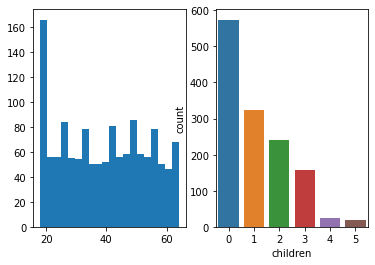

In [103]:
plt.subplot(1,2,1)
age_rep = plt.hist(df.age, bins=20) # Representar por intervalos
plt.subplot(1,2,2)
age_children = sns.countplot(x='children', data = df)

LIMPIEZA DEL DATASET

<AxesSubplot:ylabel='id'>

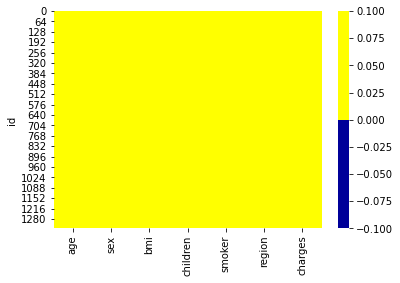

In [104]:
#Cuantos valores ausentes o Missing Data hay en el dataset?
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

      age     sex     bmi  children smoker     region      charges
id                                                                
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[162 rows x 7 columns]
count      162.000000
mean     40761.308558
std       6165.955587
min      30063.580550
25%      36203.12

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


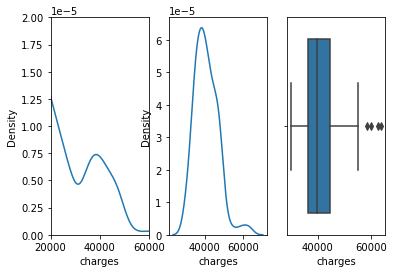

In [105]:
#Localizar los Outliers. Solo hay una variable con claros outliers (charges). Podemos intentar aislar los outliers.

plt.subplot(1,3,1)
charges_kdeplot = sns.kdeplot(df.charges)
plt.axis([20000, 60000, 0, 0.00002])

charges_outliers = df[df.charges > 30000]
print(charges_outliers)

outliers_info = charges_outliers.charges.describe()
print(outliers_info)

plt.subplot(1,3,2)
outliers_rep = sns.kdeplot(charges_outliers.charges)
plt.subplot(1,3,3)
outliers_rep2 = sns.boxplot(charges_outliers.charges)


In [1]:
#Unnecesary data
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    else:
        print(col, 'There is no repetead Data in this variable')

#Irrelevant Data --> In this dataframe all data are relevant

# Duplicate values.

Duplicated_values = df.duplicated()
duplicated_data = Duplicated_values[Duplicatd_values == True]
print(duplicated_data)

#No hay valores duplicados



NameError: name 'df' is not defined

In [133]:
#Inconsistent Data
df.head(5)
# Capitalization
cap_region = df.region.value_counts()
print(cap_region)
cap_sex = df.sex.value_counts()
print(cap_sex)
cap_smoker = df.smoker.value_counts()
print(cap_smoker)

# Formats. There is no adress or time variables so it is no necesarry to change the format of any variable

# Also there is no need to check the sintax errors because there is no strings



southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


ANALISIS DE LOS DATOS

        id  age     sex     bmi  children smoker     region      charges  \
0        0   19  female  27.900         0    yes  southwest  16884.92400   
1        1   18    male  33.770         1     no  southeast   1725.55230   
2        2   28    male  33.000         3     no  southeast   4449.46200   
3        3   33    male  22.705         0     no  northwest  21984.47061   
4        4   32    male  28.880         0     no  northwest   3866.85520   
...    ...  ...     ...     ...       ...    ...        ...          ...   
1333  1333   50    male  30.970         3     no  northwest  10600.54830   
1334  1334   18  female  31.920         0     no  northeast   2205.98080   
1335  1335   18  female  36.850         0     no  southeast   1629.83350   
1336  1336   21  female  25.800         0     no  southwest   2007.94500   
1337  1337   61  female  29.070         0    yes  northwest  29141.36030   

      Duplicated  
0          False  
1          False  
2          False  
3          

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda

<AxesSubplot:xlabel='children', ylabel='count'>

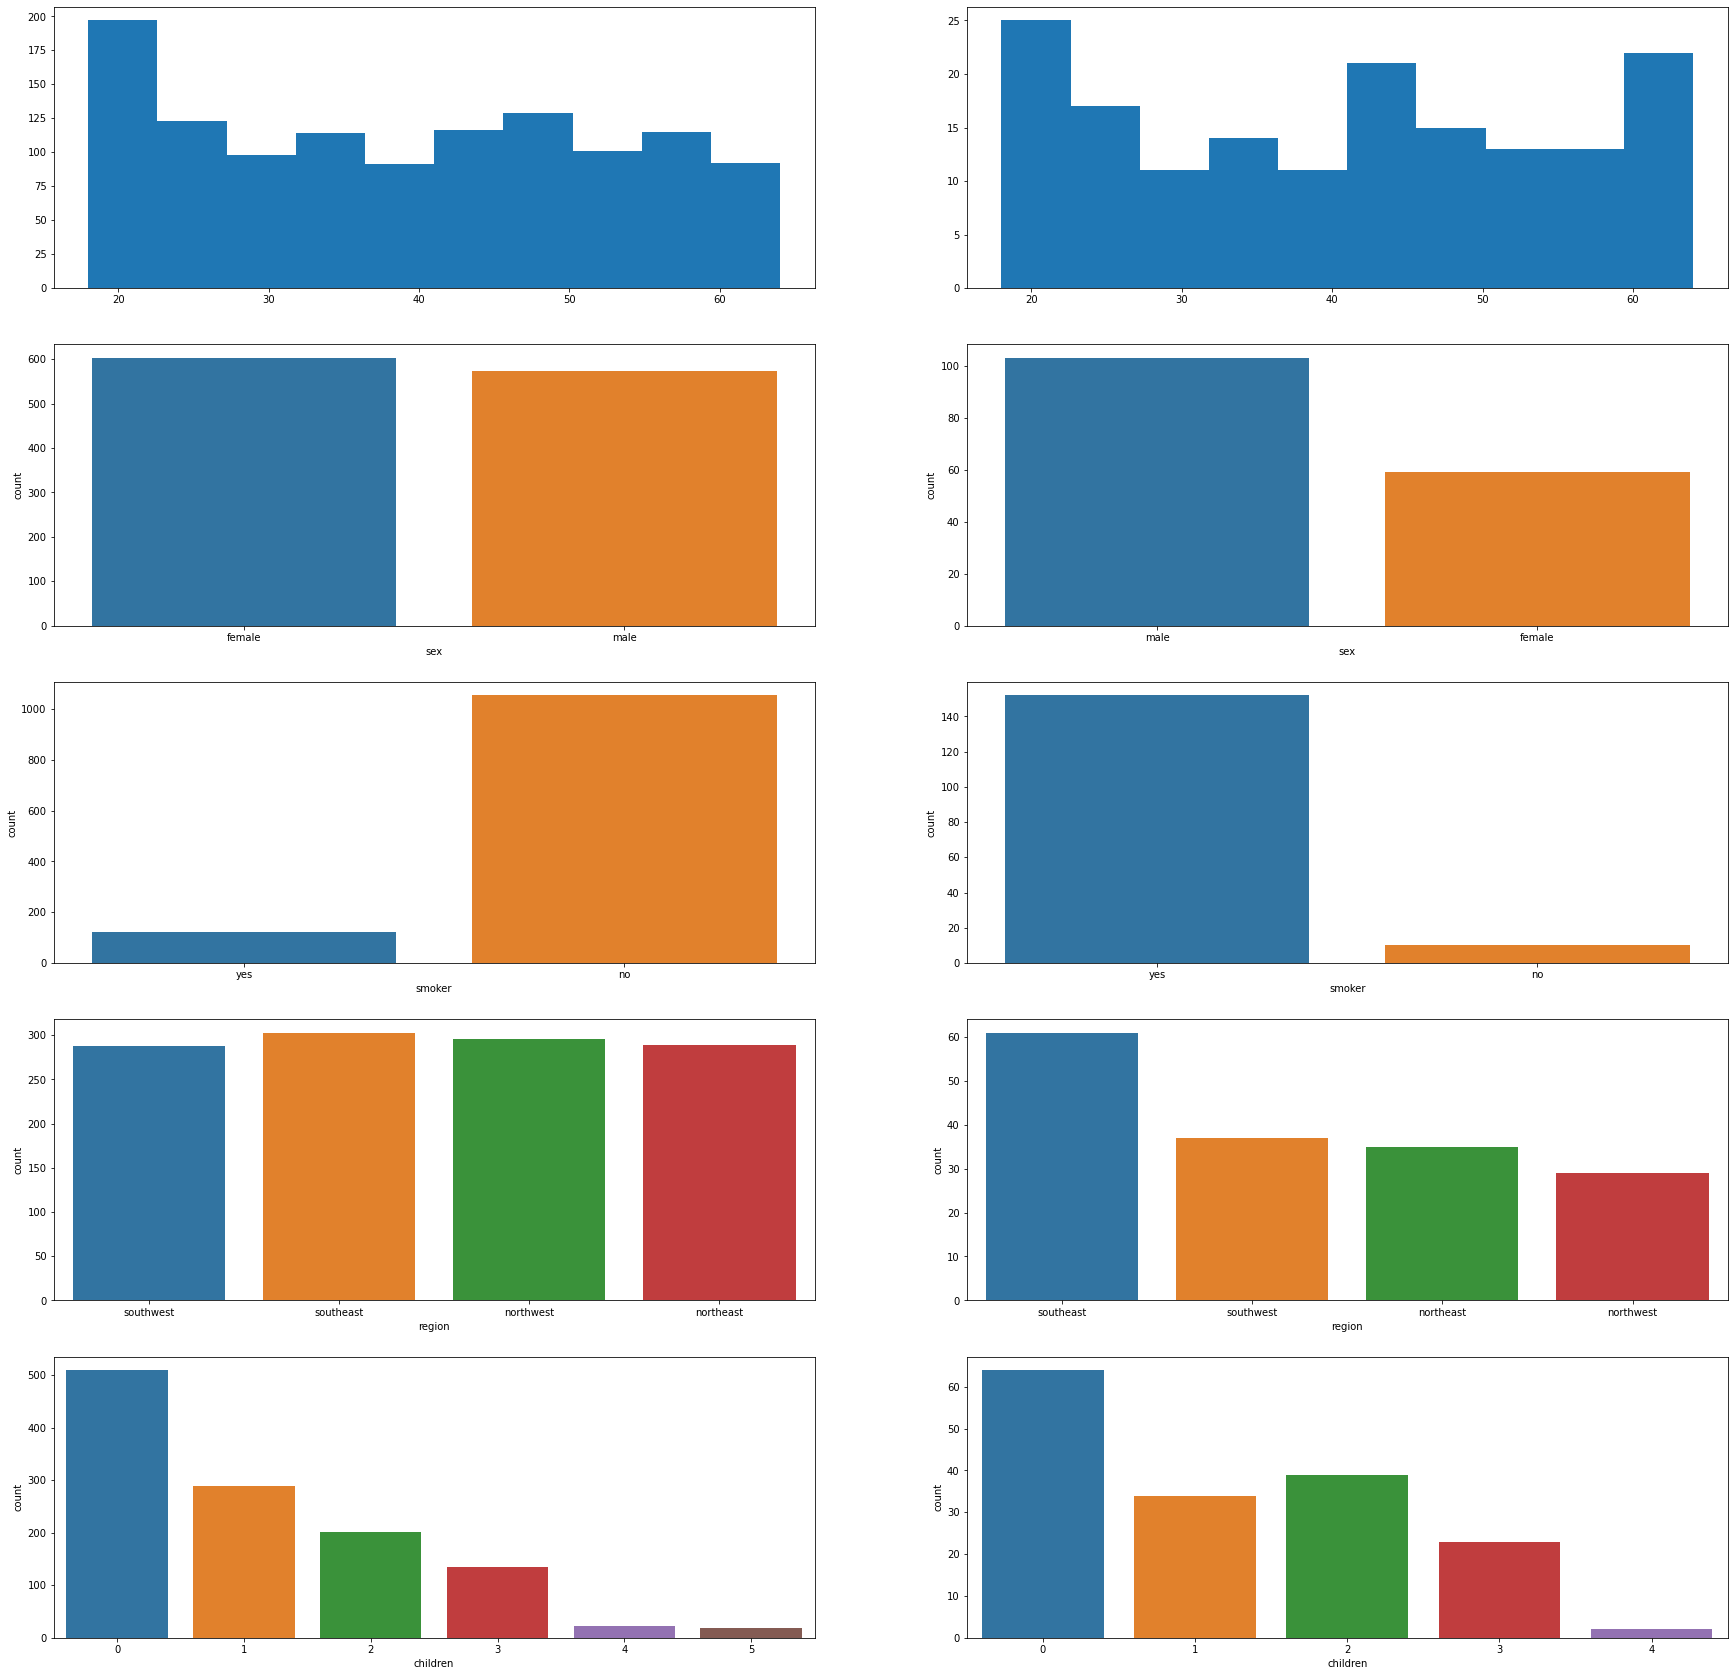

In [160]:
charges_outliers

charges_standard = df[df['charges']<30000]

print(charges_standard)

plt.figure(figsize=(30,30))
plt.subplot(5,2,1)
plt.hist(charges_standard.age)
plt.subplot(5,2,2)
plt.hist(charges_outliers.age)
plt.subplot(5,2,3)
plt.subplot(5,2,4)
sns.countplot(charges_outliers.sex)
plt.subplot(5,2,5)
sns.countplot(charges_standard.smoker)
plt.subplot(5,2,6)
sns.countplot(charges_outliers.smoker)
plt.subplot(5,2,7)
sns.countplot(charges_standard.region)
plt.subplot(5,2,8)
sns.countplot(charges_outliers.region)
plt.subplot(5,2,9)
sns.countplot(charges_standard.children)
plt.subplot(5,2,10)
sns.countplot(charges_outliers.children)


<AxesSubplot:xlabel='children', ylabel='charges'>

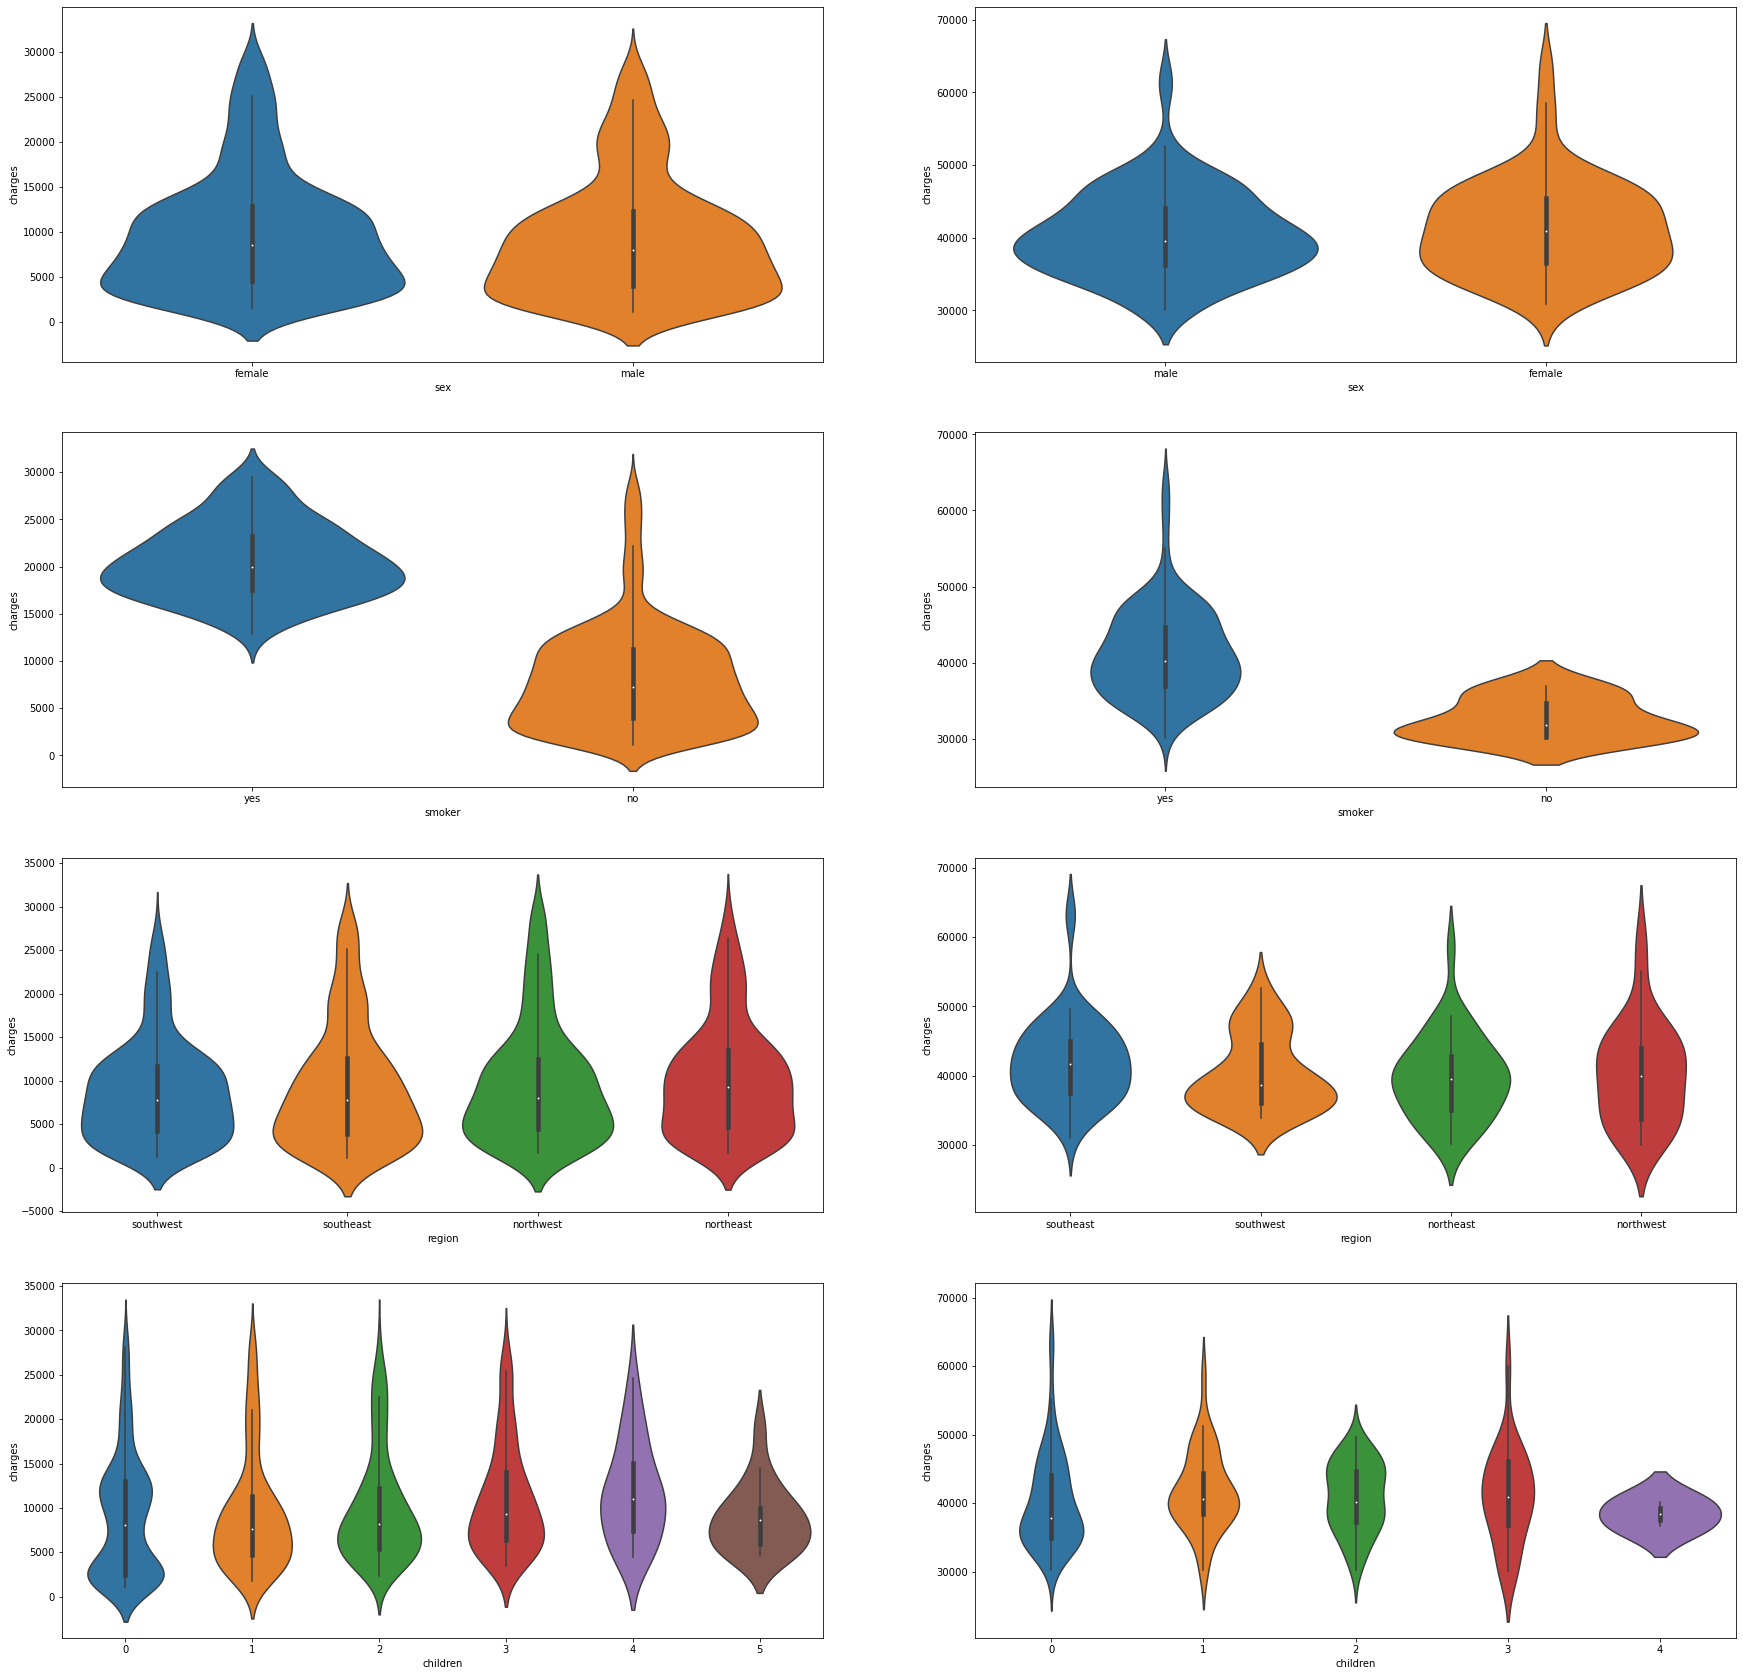

In [177]:
plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
sns.violinplot(data=charges_standard, x='sex', y='charges')
plt.subplot(4,2,2)
sns.violinplot(data=charges_outliers, x='sex', y='charges')
plt.subplot(4,2,3)
sns.violinplot(data=charges_standard, x='smoker', y='charges')
plt.subplot(4,2,4)
sns.violinplot(data=charges_outliers, x='smoker', y='charges')
plt.subplot(4,2,5)
sns.violinplot(data=charges_standard, x='region', y='charges')
plt.subplot(4,2,6)
sns.violinplot(data=charges_outliers, x='region', y='charges')
plt.subplot(4,2,7)
sns.violinplot(data=charges_standard, x='children', y='charges')
plt.subplot(4,2,8)
sns.violinplot(data=charges_outliers, x='children', y='charges')

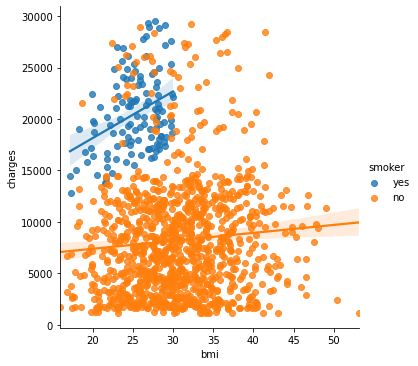

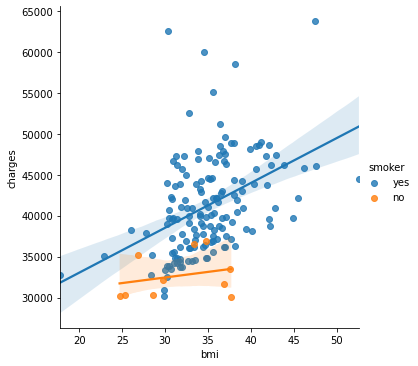

In [176]:

sns.lmplot(x='bmi', y='charges', hue='smoker', data=charges_standard)

sns.lmplot(x='bmi', y='charges', hue='smoker', data=charges_outliers)